In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>
<font color="#ff2e2e">
Corner Detection
</font>
</h1>

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab.patches import cv2_imshow

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [59]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete the harris_points function without using OpenCV functions </font></h3>

In [292]:
def calc_sobel(img):
  horizontal_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  vertical_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
  
  Ix = cv2.filter2D(src=img, ddepth=-1, kernel=horizontal_sobel)
  Iy = cv2.filter2D(src=img, ddepth=-1, kernel=vertical_sobel)

  return Ix, Iy


def harris_points(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''    
    
    result = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    result = cv2.GaussianBlur(result, (5,5), 0)

    Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    Ixx = Ix**2
    Ixy = Ix*Iy
    Iyy = Iy**2

    gxx = cv2.GaussianBlur(Ixx, (5, 5), 2)
    gxy = cv2.GaussianBlur(Ixy, (5, 5), 2)
    gyy = cv2.GaussianBlur(Iyy, (5, 5), 2)

    # Compute the Harris response for each pixel.

    # M: [Ixx, Ixy]
    #    [Ixy, Iyy]

    det_M = gxx*gyy - gxy**2
    trace_M = gxx + gyy
    rvalue = det_M - 0.04*trace_M**2

    cv2.normalize(rvalue,rvalue,0,255,cv2.NORM_MINMAX)
    threshold = 0.25*np.max(rvalue)

    binary_corners = np.zeros_like(image)
    for i in range(rvalue.shape[0]):
      for j in range(rvalue.shape[1]):
        if(rvalue[i,j]>=threshold):
          binary_corners[i,j] = rvalue[i,j]

    for i in range(10,binary_corners.shape[0]-10):
      for j in range(10,binary_corners.shape[1]-10): 
        window=binary_corners[i-10:i+11, j-10:j+11]
        maxV=np.max(window)
        window[window < maxV] = 0
        binary_corners[i-10:i+11, j-10:j+11] = window
        if binary_corners[i-10, j-10] !=0:
          binary_corners[i-10, j-10] = 255
        
    cv2_imshow(binary_corners)
    for i in range(binary_corners.shape[0]):
      for j in range(binary_corners.shape[1]):
         if binary_corners[i,j]:
          cv2.circle(result, (j,i), 5, (255,255,0), thickness=-1)
                
    return result
    
    #############
    # Your code #
    #############

<h3><font color = "#079e05"> Show the result </font></h3>

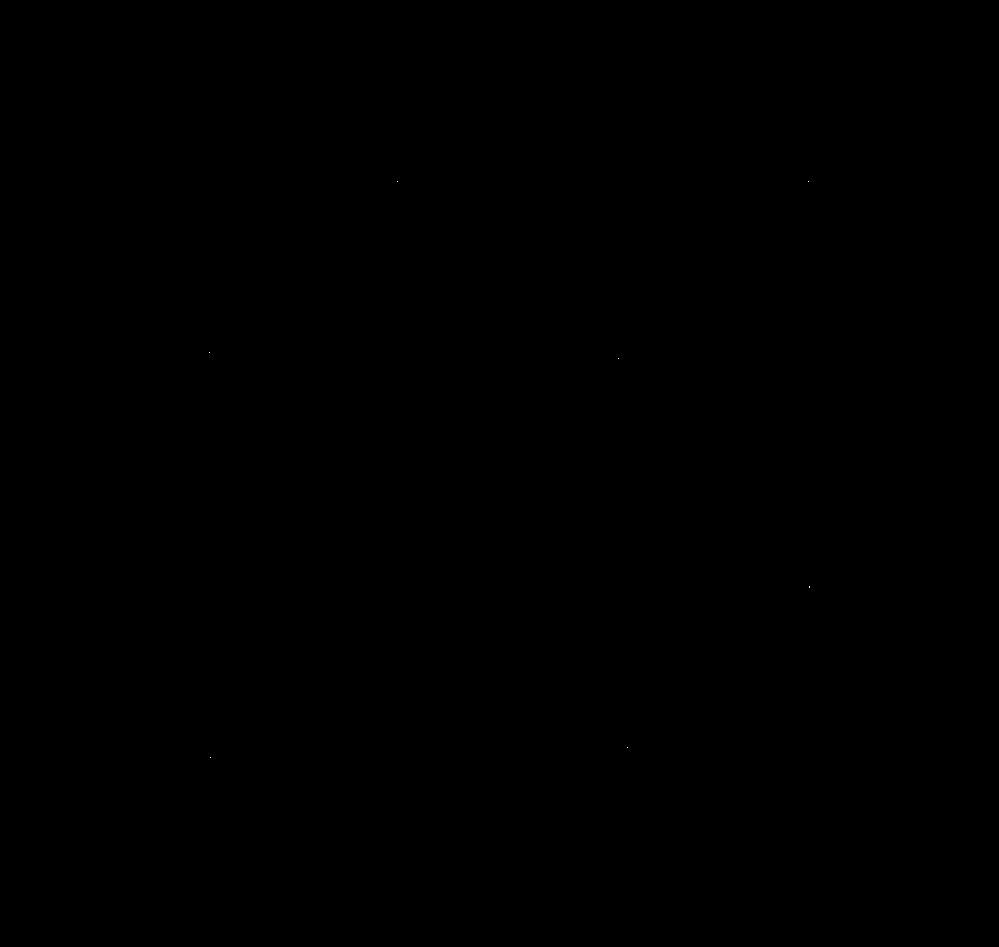

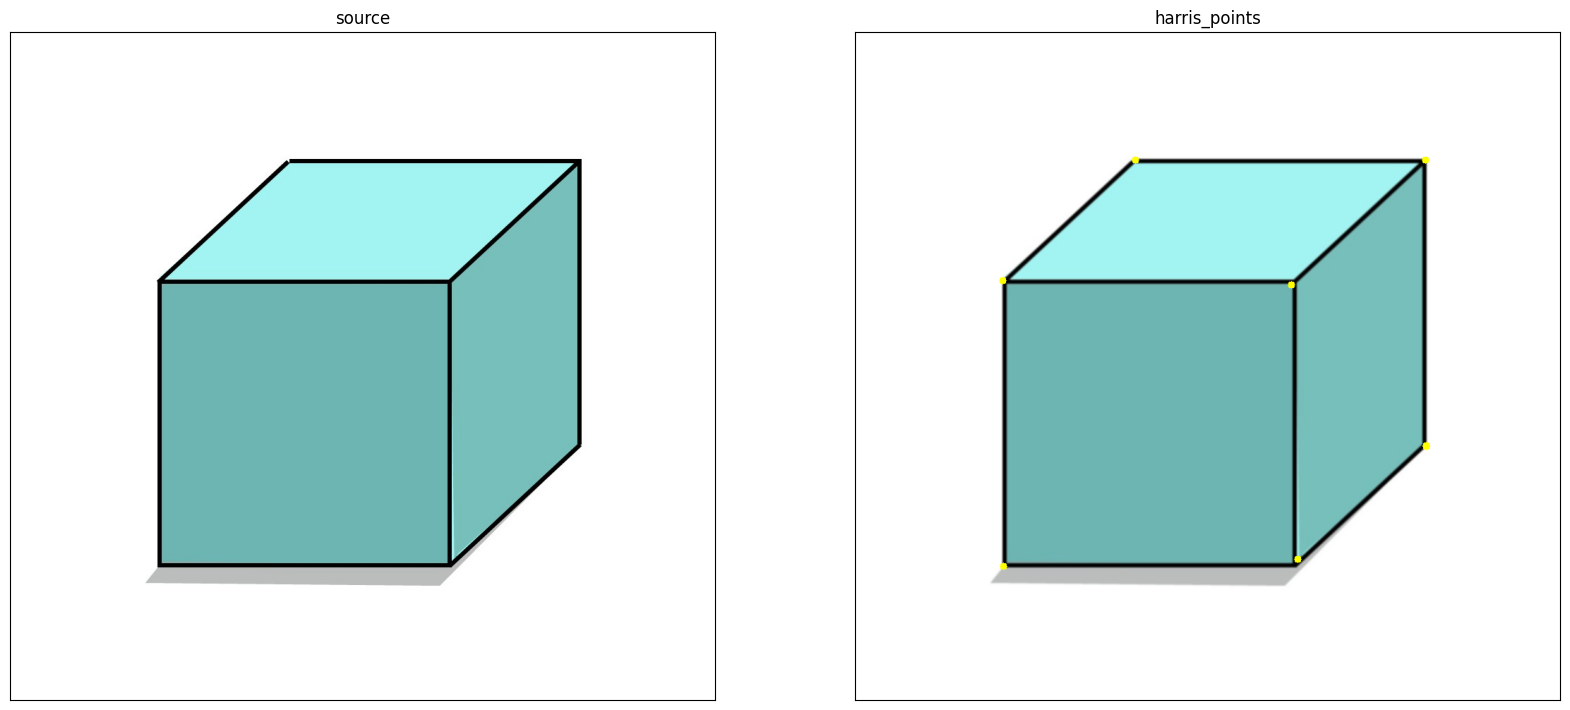

In [293]:
image_list = []
path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW3/images/Q5/'
image = cv2.imread(os.path.join(path, 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), 'harris_points', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')

<h3><font color = "#079e05"> Complete the harris_points_OpenCV function with using OpenCV functions </font></h3>

In [290]:
def harris_points_OpenCV(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''  
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    harris = cv2.cornerHarris(gray_img,10,3,0.04)

    harris = cv2.dilate(harris,None)

    image[harris>0.1*harris.max()]=[255,0,0]
    #############
    # Your code #
    #############
    return harris

<h3><font color = "#079e05"> Show the result </font></h3>

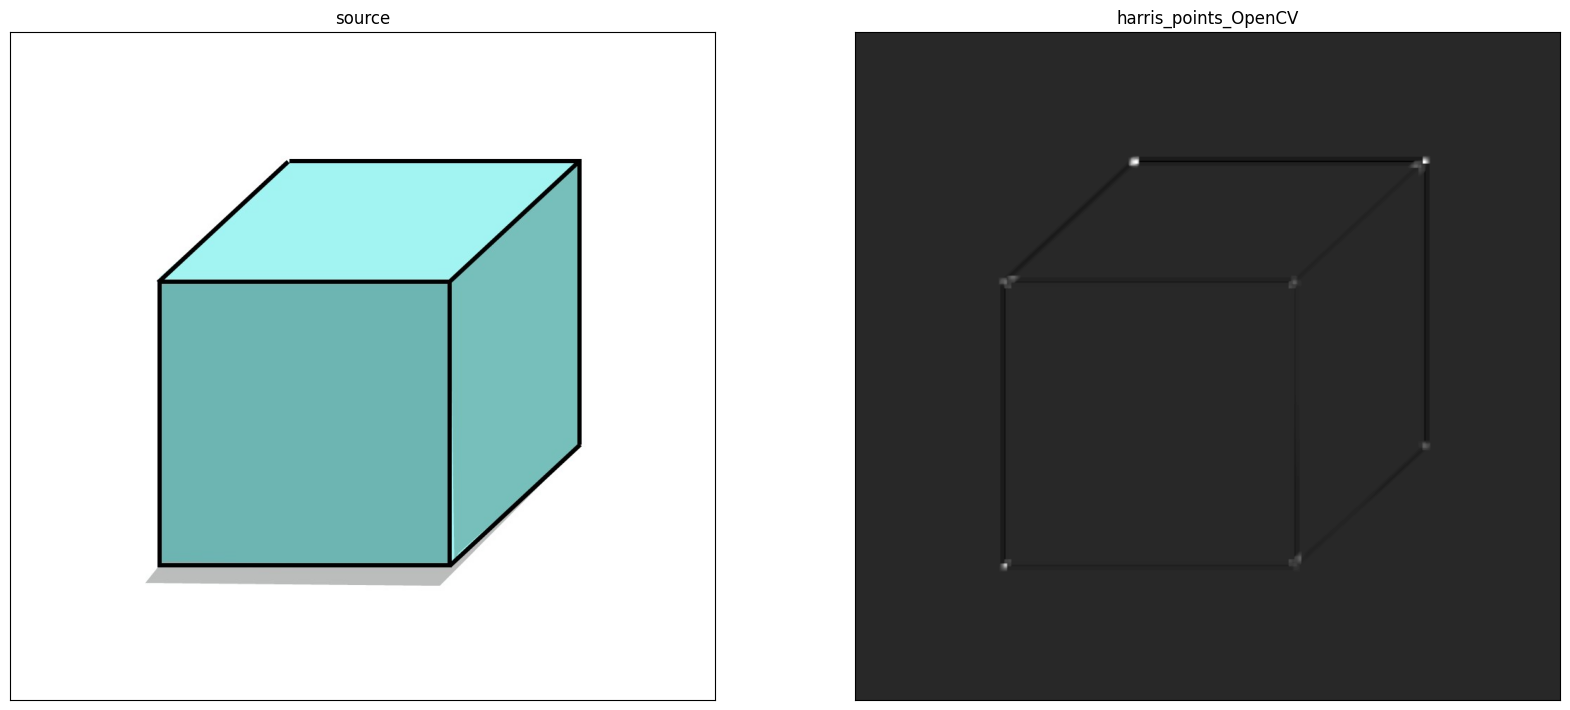

In [291]:
image_list = []
path = path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW3/images/Q5/'
image = cv2.imread(os.path.join(path, 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points_OpenCV(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), 'harris_points_OpenCV', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')